# Analyzing NFL Data with Python

## Introduction
Welcome to the "Analyzing NFL Data with Python" workshop! In this workshop, you will learn how to retrieve, process, and analyze NFL play-by-play data for the 2023 season using Python. We will focus on passing and rushing plays, calculate Expected Points Added (EPA), and visualize the data to gain insights.

Now that you have installed the necessary packages, let's import them:

In [1]:
# Dependencies
import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import os
import urllib.request

## Part 1: Retrieving NFL Play-By-Play Data
We will start by retrieving the NFL play-by-play data for the 2023 season:

In [2]:
# define year variable for 2023 season
year = 2023
# import data for this year
pbp = nfl.import_pbp_data([year])

2023 done.
Downcasting floats.


We can take a look at the size of the dataset and a preview of it's structure:

In [3]:
# checking the size of the data
pbp.shape

(24023, 384)

In [4]:
# preview of data
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0,0
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,None,None,NaN,None,NaN,48000;52641;54721;56098;53639;53448;55912;4510...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11,11
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,49410;54563;41475;52516;47812;46629;53445;4134...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11,11
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",4.0,49410;54563;41475;52516;47812;46629;53445;4134...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11,11
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,I_FORM,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",NaN,49410;41475;52516;47812;53445;46629;41349;5348...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11,11


There's too many columns here to display, we can list them out by using:

In [5]:
# Remove max_columns limits of pandas
pd.set_option('display.max_columns', None)
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [6]:
# Or directly print list of columns
print(pbp.columns.tolist())

['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'td_player_name', 'td_player_id', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'score_differential', 'posteam_score_post', 'defteam_score_post', 'score_differential

## Part 2: Processing and Calculating EPA

**Expected Points Added (EPA) calculates how well a team performs relative to expectation on a particular play. This advanced metric is calculated by the expected points gained or lost based on the down, distance, and field position at the start of a play compared to the end of the play.**

For example, if a team starts a drive on the 50-yard line, its expected points to start the drive would be about 2.5. If the team ends the drive with a field goal, thus gaining 3 points, its EPA for that drive would be found by subtracting its expected points from how many points it actually gained, 3 – 2.5 = **0.5 EPA**. However if the team scores a 50 yard touchdown, the EPA of the play would be 7 - 2.5 = **4.5 EPA**.

In this section, we'll filter the data for passing and rushing plays for each team, calculate the average EPA for both, and visualize the results.

First, we filter the data for passing and rushing plays:

In [7]:
# Filter down for passing and rusing plays
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
# Remove the rows that contains NULL values
pbp_rp.dropna(subset=['epa','posteam','defteam'])
pbp_rp.shape

(17941, 384)

Next, we calculate the average EPA for passing plays:

In [8]:
# Select only passing plays
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)]
# Group the plays by the offensive team running the play and calculate the average passing epa for each team
pass_epa = pass_epa.groupby('posteam')['epa'].mean()
pass_epa.reset_index()

,posteam,epa
0,ARI,-0.189468
1,ATL,-0.061730
2,BAL,0.047212
3,BUF,0.192641
4,CAR,-0.111289
5,CHI,-0.111928
6,CIN,0.010631
7,CLE,-0.159058
8,DAL,0.162035
9,DEN,0.002758


Cleaning up the table and sorting the values by highest passing epa

In [9]:
# Rename and sort list
pass_epa = pass_epa.reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values(by='pass_epa', ascending=False)

,posteam,pass_epa
28,SF,0.305861
19,MIA,0.216030
3,BUF,0.192641
25,PHI,0.175895
8,DAL,0.162035
15,KC,0.161124
12,HOU,0.140411
17,LAC,0.127671
29,TB,0.111112
20,MIN,0.096661


Now that we've got the stats for passing epa for each team, let's find the rushing epa for each team:

In [10]:
# Isolate rushing plays
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)]
# Group them by team and calculate the average
rush_epa = rush_epa.groupby('posteam')['epa'].mean().reset_index()
# Rename the column
rush_epa = rush_epa.rename(columns = {'epa' : 'rush_epa'})
# Sort list
rush_epa.sort_values(by='rush_epa', ascending=False)

,posteam,rush_epa
2,BAL,0.067002
19,MIA,0.032029
3,BUF,0.031955
25,PHI,-0.006230
5,CHI,-0.017388
16,LA,-0.050569
30,TEN,-0.054309
28,SF,-0.055468
10,DET,-0.061782
27,SEA,-0.064320


Now that we have both the rushing and passing epa for each team, we can combine the data and download team logos:

In [11]:
# Combine two lists
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa

,posteam,pass_epa,rush_epa
0,ARI,-0.189468,-0.087444
1,ATL,-0.061730,-0.159272
2,BAL,0.047212,0.067002
3,BUF,0.192641,0.031955
4,CAR,-0.111289,-0.188678
5,CHI,-0.111928,-0.017388
6,CIN,0.010631,-0.107700
7,CLE,-0.159058,-0.103200
8,DAL,0.162035,-0.094859
9,DEN,0.002758,-0.067527


In [12]:
# Fetch Team Logos
logos = nfl.import_team_desc()[['team_abbr','team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [18]:
# Download team logos
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

# Create table for team logo and it's file path
data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

# Combine logo paths to epa data
epa_with_logos = pd.merge(epa,logo_data, left_on='posteam', right_on='team_abbr')
epa_with_logos

,posteam,pass_epa,rush_epa,team_abbr,logo_path
0,ARI,-0.189468,-0.087444,ARI,logos/ARI.tif
1,ATL,-0.061730,-0.159272,ATL,logos/ATL.tif
2,BAL,0.047212,0.067002,BAL,logos/BAL.tif
3,BUF,0.192641,0.031955,BUF,logos/BUF.tif
4,CAR,-0.111289,-0.188678,CAR,logos/CAR.tif
5,CHI,-0.111928,-0.017388,CHI,logos/CHI.tif
6,CIN,0.010631,-0.107700,CIN,logos/CIN.tif
7,CLE,-0.159058,-0.103200,CLE,logos/CLE.tif
8,DAL,0.162035,-0.094859,DAL,logos/DAL.tif
9,DEN,0.002758,-0.067527,DEN,logos/DEN.tif


## Part 3: Visualizing the Data
In this part, we'll create a visualization of the data to compare the EPA for passing and rushing plays. We'll use team logos for the plot.

Let's start by defining the chart

In [19]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [10,7]
plt.rcParams["figure.autolayout"] = True

# Set the axes to each epa type
x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

Let's define a function to load the image into the chart:

In [20]:
# Load image into the chart
def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

Putting everything together, we can start adding the points to the chart:

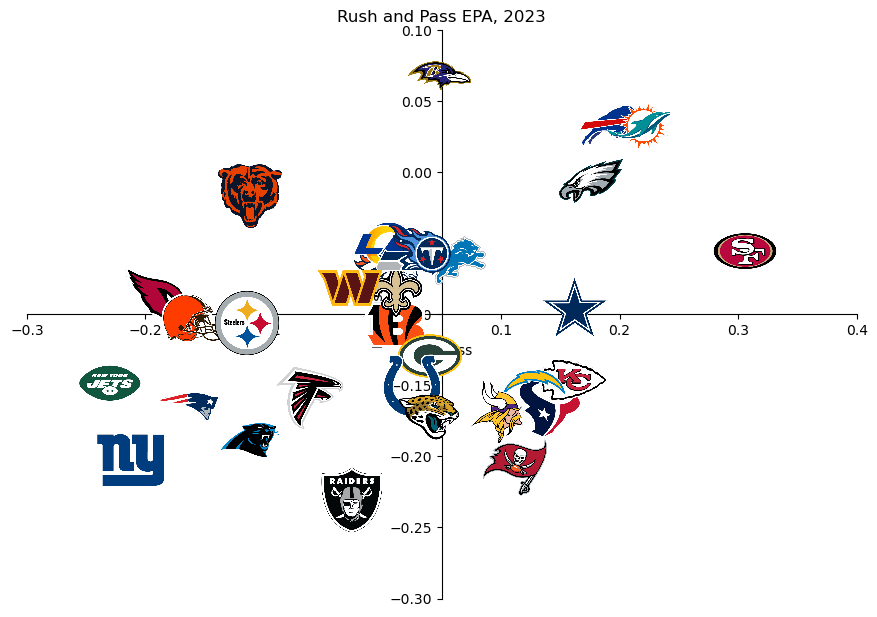

In [21]:
fig, ax = plt.subplots()

# Add points using logo
for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Label the chart
plt.xlim(-0.3, 0.4)
plt.ylim(-0.3, 0.10)
plt.title("Rush and Pass EPA, 2023")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")
plt.show()

## Additional Exploration

The nfl_play_by_play library has more advanced data and metrics such as the Next Gen Stats data, we can access this by:

In [22]:
df = nfl.import_ngs_data(stat_type='passing')

In [23]:
df.columns

Index(['season', 'season_type', 'week', 'player_display_name',
       'player_position', 'team_abbr', 'avg_time_to_throw',
       'avg_completed_air_yards', 'avg_intended_air_yards',
       'avg_air_yards_differential', 'aggressiveness',
       'max_completed_air_distance', 'avg_air_yards_to_sticks', 'attempts',
       'pass_yards', 'pass_touchdowns', 'interceptions', 'passer_rating',
       'completions', 'completion_percentage',
       'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_first_name',
       'player_last_name', 'player_jersey_number', 'player_short_name'],
      dtype='object')

In [24]:
# Filter down to week = 0, full season data for the year(s) specified
df = df[df['week'] == 0]
df = df[df['season'] == year]
df = df.reset_index()
df

,index,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,4094,2023,REG,0,Will Levis,QB,TEN,2.841708,5.574167,10.990588,-5.416422,12.149533,56.103649,1.902353,107,699,4,2,80.704829,60,56.074766,60.377197,-4.302431,24.933427,60.236139,00-0039152,Will,Levis,8,W.Levis
1,4095,2023,REG,0,Brock Purdy,QB,SF,2.705141,7.305465,8.239289,-0.933824,12.400000,46.804962,-1.074519,250,2329,15,5,109.900000,172,68.800000,66.619850,2.180150,20.848061,46.804962,00-0037834,Brock,Purdy,13,B.Purdy
2,4096,2023,REG,0,Dak Prescott,QB,DAL,2.667713,6.515660,8.127017,-1.611357,17.333333,54.949659,-0.418746,300,2415,17,6,105.069444,212,70.666667,65.086103,5.580564,20.832106,62.445780,00-0033077,Rayne,Prescott,4,D.Prescott
3,4097,2023,REG,0,Ryan Tannehill,QB,TEN,2.705045,6.153878,9.200649,-3.046772,15.822785,62.214613,0.369481,158,1128,2,6,71.914557,98,62.025316,62.531636,-0.506320,21.667914,62.214613,00-0029701,Ryan,Tannehill,17,R.Tannehill
4,4098,2023,REG,0,Daniel Jones,QB,NYG,2.734987,4.137315,6.772876,-2.635561,10.000000,50.971814,-2.593137,160,909,2,6,70.546875,108,67.500000,67.023765,0.476235,19.828677,55.470962,00-0035710,Daniel,Jones,8,D.Jones
5,4099,2023,REG,0,Geno Smith,QB,SEA,2.962111,5.942908,7.734107,-1.791199,13.666667,50.389786,-1.401607,300,2171,11,7,89.180556,196,65.333333,62.226822,3.106512,22.141164,54.523357,00-0030565,Eugene,Smith,7,G.Smith
6,4100,2023,REG,0,Aidan O'Connell,QB,LV,2.648365,4.376364,6.939800,-2.563436,14.423077,54.638862,-2.290200,104,675,2,3,76.402244,66,63.461538,66.651279,-3.189741,20.045134,57.491545,00-0038579,Aidan,O'Connell,4,A.O'Connell
7,4101,2023,REG,0,Gardner Minshew,QB,IND,2.751016,5.299448,7.319046,-2.019598,14.453125,45.821229,-1.112490,256,1721,8,6,83.805339,163,63.671875,64.583501,-0.911626,19.822527,47.596215,00-0035289,Gardner,Minshew,10,G.Minshew
8,4102,2023,REG,0,Jalen Hurts,QB,PHI,2.999200,6.300095,8.832535,-2.532440,16.065574,54.635646,0.128310,305,2347,15,8,96.987705,210,68.852459,61.927328,6.925131,22.823484,60.594265,00-0036389,Jalen,Hurts,1,J.Hurts
9,4103,2023,REG,0,Jimmy Garoppolo,QB,LV,2.938347,6.565636,8.076159,-1.510522,16.071429,36.722454,-0.893354,168,1205,7,9,78.100198,110,65.476190,65.868097,-0.391906,20.338312,54.708877,00-0031345,James,Garoppolo,10,J.Garoppolo


In [25]:
# Calculate the average time to throw and completion % above expectation
average_ttt = df['avg_time_to_throw'].mean()
average_cpae = df['completion_percentage_above_expectation'].mean()

average_cpae

0.5306645729195986

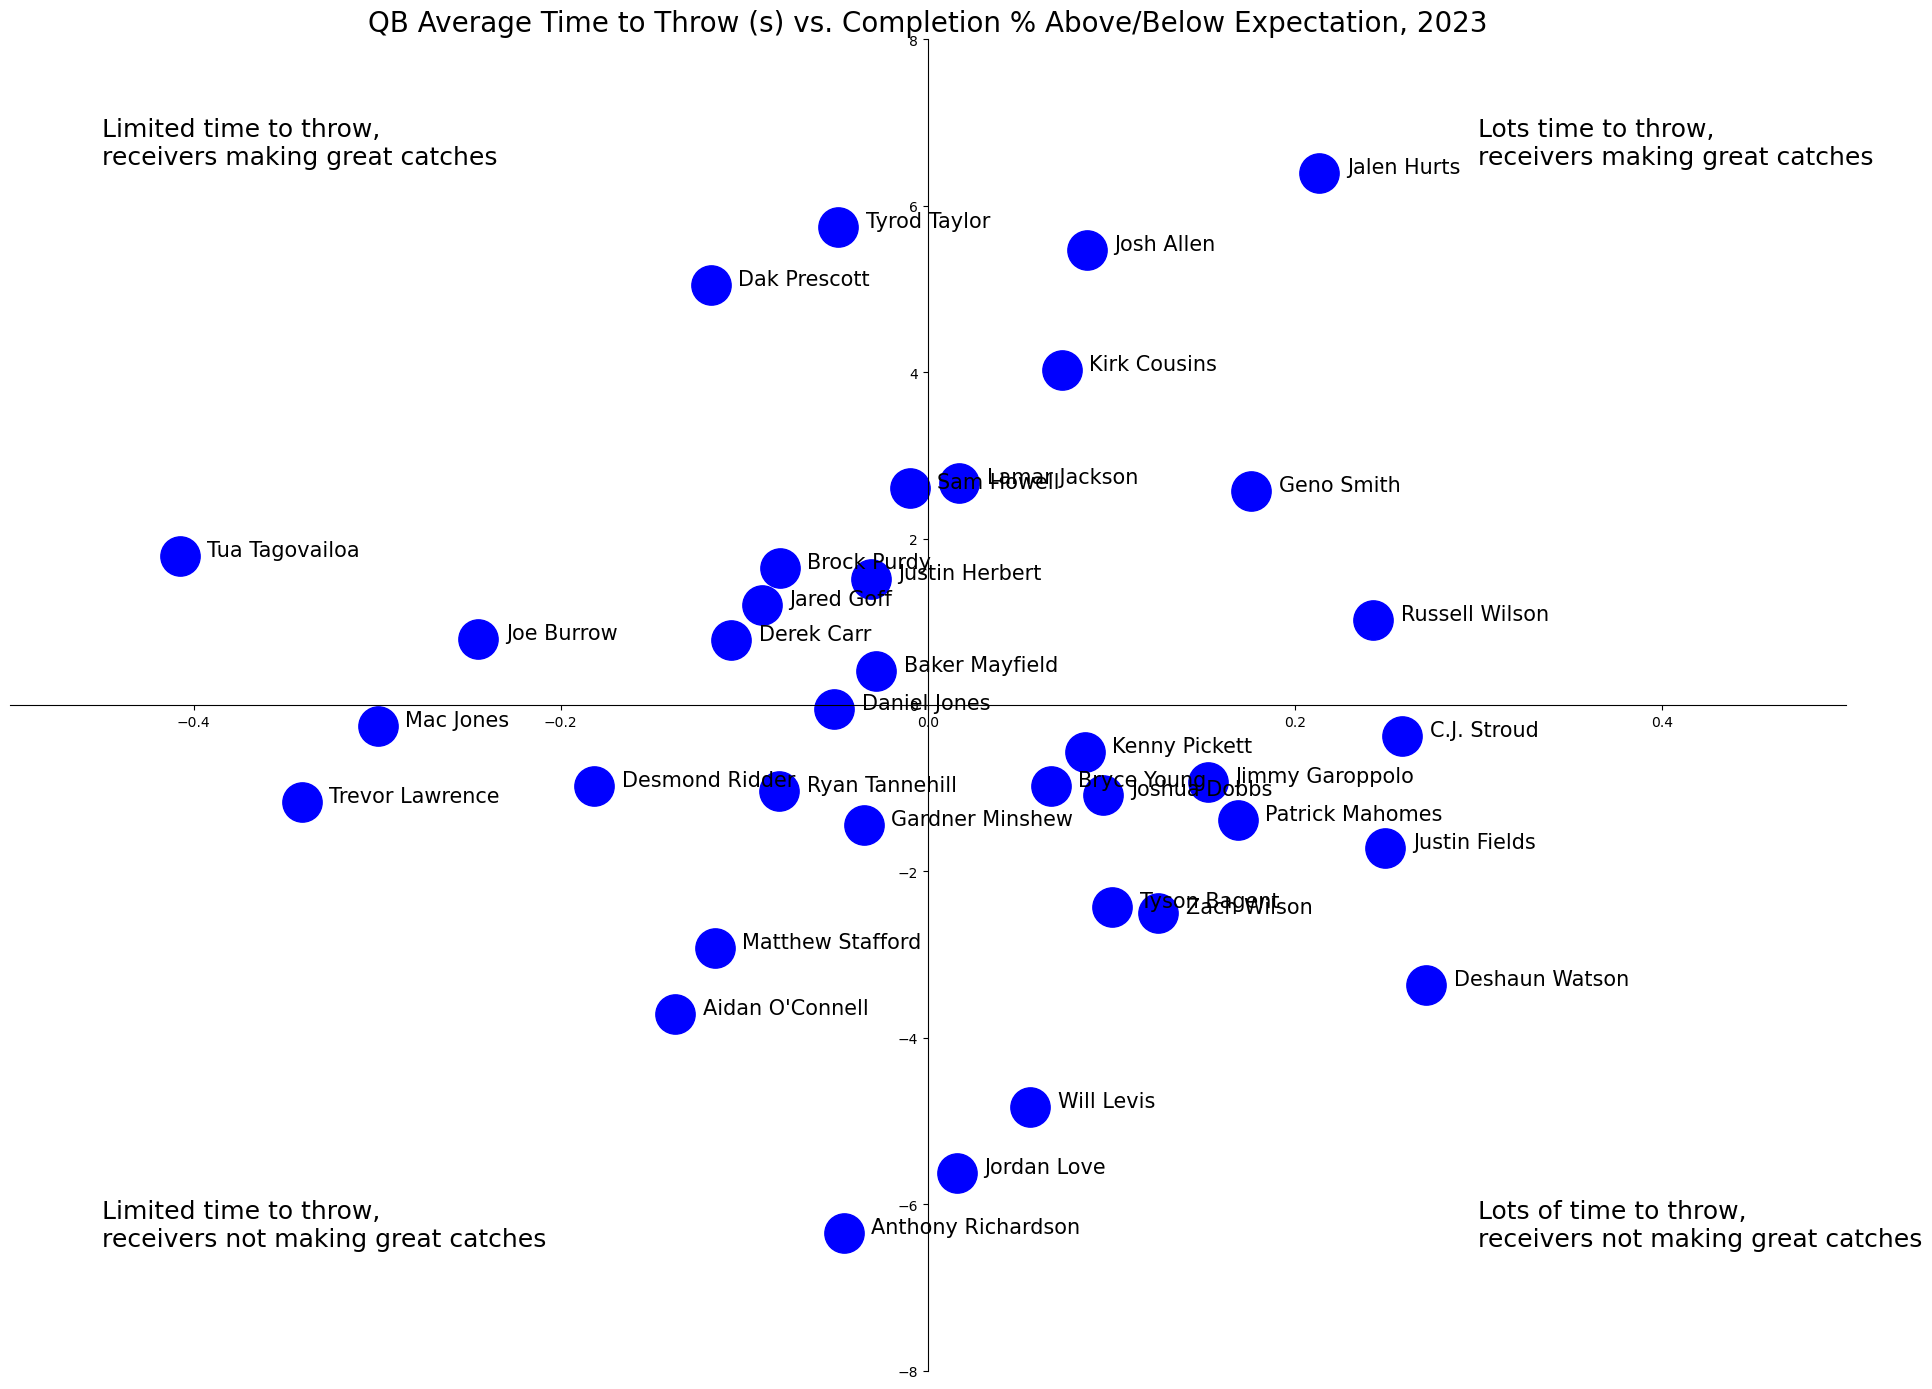

In [26]:
# Visualize the data

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True


# Initialize empty lists for x,y 
x = []
y = []

# Define the x and y variables
for qb in df.index:
    x.append(df['avg_time_to_throw'][qb] - average_ttt)
    y.append(df['completion_percentage_above_expectation'][qb] - average_cpae)
    
# Put x,y into dictionary
xy = pd.DataFrame({'x' : x, 'y' : y})

# Define the plot
fig, ax = plt.subplots()

ax.scatter(xy['x'], xy['y'], s=800, c='blue')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set x and y axis limits
plt.xlim((-0.5,0.5))
plt.ylim((-8,8))


# Annotate with QB name and year
for name in xy.index:
    plt.annotate(f"{df['player_display_name'][name]}",
                 (xy['x'][name] + 0.015,
                  xy['y'][name]),
                  fontsize=15)

# Annotate Quadrants
plt.annotate('Lots time to throw,\nreceivers making great catches', (0.3,6.5), fontsize=18)
plt.annotate('Limited time to throw,\nreceivers making great catches', (-0.45,6.5), fontsize=18)
plt.annotate('Limited time to throw,\nreceivers not making great catches', (-0.45,-6.5), fontsize=18)
plt.annotate('Lots of time to throw,\nreceivers not making great catches', (0.3,-6.5), fontsize=18)
    

# Add a title
plt.title(f'QB Average Time to Throw (s) vs. Completion % Above/Below Expectation, 2023', fontsize=20)

    
# Style the chart
plt.show()

Sources: https://www.youtube.com/watch?v=auyOjPoURRg&ab_channel=MFANS, https://www.youtube.com/watch?v=wWgGgmqijNU&ab_channel=TimBryan
